STAGE_1: DATA UNDERSTANDING, PREPARATION AND EXPLORATION
* Reading the CSV file and segregation of continuous feature from categorical
* Investigating the sum of the missing values
* Data Quality Assessment

READING THE CSV FILE AND FEATURE SEGREGATION

In [14]:
# Reading the dataset into a Pandas dataframe
import pandas as pd
from pandas import read_csv

maternal_data = read_csv(r"C:\Users\Dell\Downloads\Maternal Health Risk Data Set.csv")
#print(maternal_data.shape)
print(maternal_data)
# Separate Categorical_features from the maternal_data

categorical_features = maternal_data.select_dtypes("object")
print(categorical_features.shape)
print(categorical_features)
# Grouping the continuous features together to ease the quality assessment of each. The categorical variable has been stored as well.
# The drop function is used to remove the categorical feature(RiskLevel) along the column.
# The continuous_features variable consist of integers and float.
continuous_features = maternal_data.drop(labels='RiskLevel',axis=1)
print(continuous_features.shape)
print(continuous_features)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0      25         130           80  15.0      98.0         86  high risk
1      35         140           90  13.0      98.0         70  high risk
2      29          90           70   8.0     100.0         80  high risk
3      30         140           85   7.0      98.0         70  high risk
4      35         120           60   6.1      98.0         76   low risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[1014 rows x 7 columns]
(1014, 1)
      RiskLevel
0     high risk
1     high risk
2     high risk
3     high risk
4      lo

In [15]:
# Investigating the sum of the missing values for each feature in the continuous_feature variable.
missing_value_continuous=continuous_features.isnull().sum()
feature_missing_value = continuous_features.isnull().values.any() # Testing the validity if missing value exist.
print(feature_missing_value)
print(missing_value_continuous)

False
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
dtype: int64


In [16]:
# Investigating the sum of missing value for each feature in the categorical_features variable.
missing_value_categorical=categorical_features.isnull().values.any()
categorical_feature_missing_value=categorical_features.isnull().sum()
print(missing_value_categorical)
print(categorical_feature_missing_value)

False
RiskLevel    0
dtype: int64


Data Quality Assessment for the Continuous Variables
* Feature count
* % missing values
* Cardinality
* Min. value
* 1st Qrt
* Mean, median
* 3rd Qrt.
* Max. value
* Std Deviation
* Histogram

In [17]:
# Feature count
feature_count_continuous = continuous_features.count()
feature_count_continuous

Age            1014
SystolicBP     1014
DiastolicBP    1014
BS             1014
BodyTemp       1014
HeartRate      1014
dtype: int64

In [18]:
# % of missing values
missing_feature_percent = continuous_features.isnull().sum()/(len(maternal_data))*100
missing_feature_percent

Age            0.0
SystolicBP     0.0
DiastolicBP    0.0
BS             0.0
BodyTemp       0.0
HeartRate      0.0
dtype: float64

VISUAL DISPLAY OF MISSING VALUES PATTERN

<AxesSubplot:>

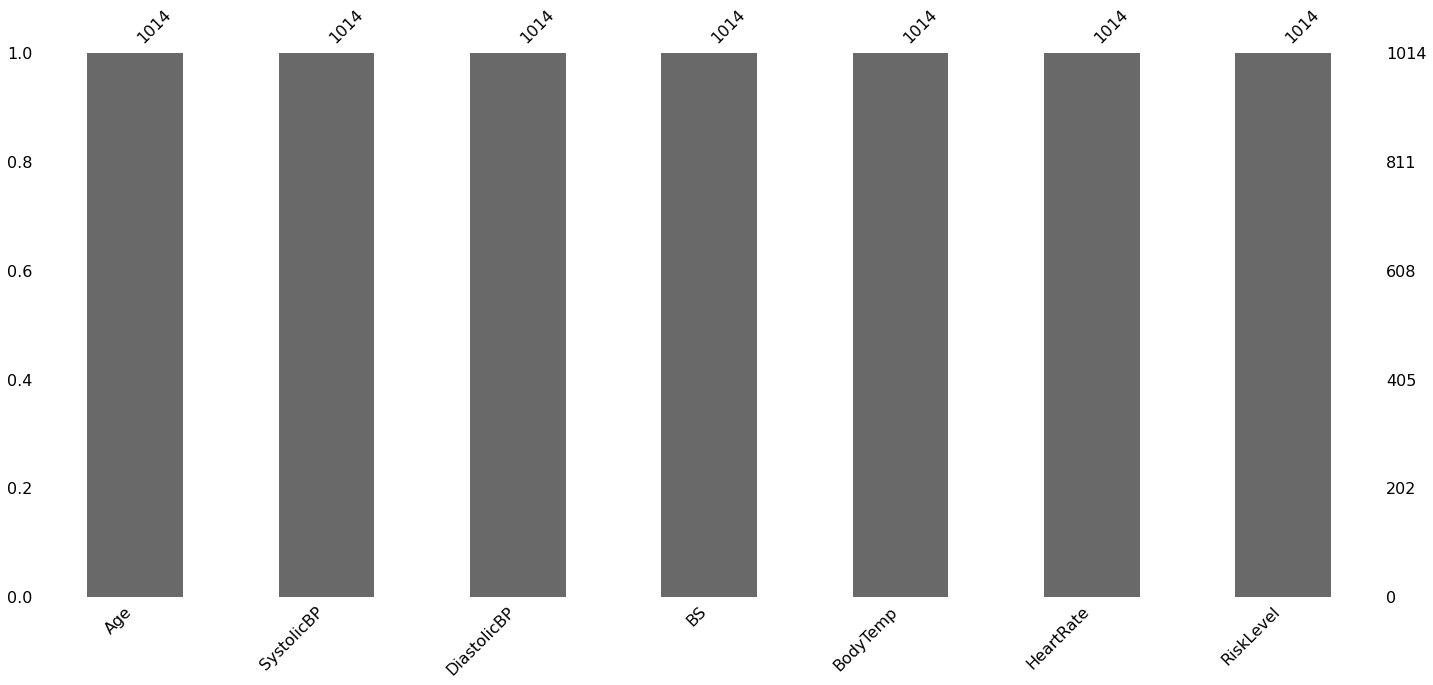

In [6]:
import missingno as msno
msno.bar(maternal_data)

In [19]:
# Cardinality check for continuous feature

continuous_features.apply(pd.Series.nunique)

Age            50
SystolicBP     19
DiastolicBP    16
BS             29
BodyTemp        8
HeartRate      16
dtype: int64

In [20]:
# minimum values of the continuous features
continuous_features.min()

Age            10.0
SystolicBP     70.0
DiastolicBP    49.0
BS              6.0
BodyTemp       98.0
HeartRate       7.0
dtype: float64

In [21]:
# maximum values of the continuous features
continuous_features.max()

Age             70.0
SystolicBP     160.0
DiastolicBP    100.0
BS              19.0
BodyTemp       103.0
HeartRate       90.0
dtype: float64

In [22]:
# This is needed to tabulate the Data Quality table.
continuous_features_description = continuous_features.describe().round(0)
continuous_features_description

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.0,1014.0,1014.0,1014.0,1014.0,1014.0
mean,30.0,113.0,76.0,9.0,99.0,74.0
std,13.0,18.0,14.0,3.0,1.0,8.0
min,10.0,70.0,49.0,6.0,98.0,7.0
25%,19.0,100.0,65.0,7.0,98.0,70.0
50%,26.0,120.0,80.0,8.0,98.0,76.0
75%,39.0,120.0,90.0,8.0,98.0,80.0
max,70.0,160.0,100.0,19.0,103.0,90.0


Histogram Plots for each of the continuous variables

However, the variable, BodyTemp will be plotted on a bar plot(to produce more informative visuals) because it has a Cardinality less than 10.

This visualized plots will form part of the data quality report.

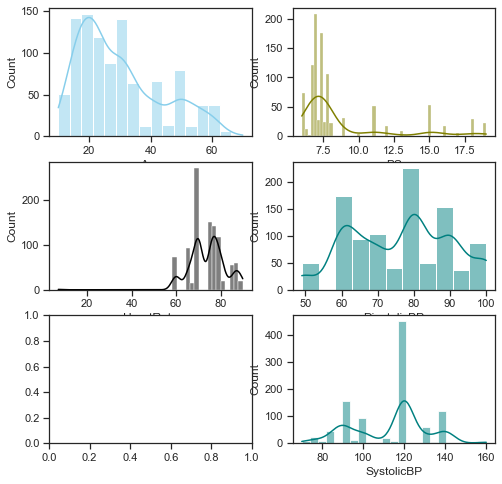

In [26]:
# Histogram plots

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

fig,axs = plt.subplots(3,2, figsize=(8,8))
sns.histplot(data=continuous_features, x="Age", kde=True, color="skyblue",ax=axs[0,0])
sns.histplot(data=continuous_features, x="BS", kde=True, color="olive",ax=axs[0,1])
sns.histplot(data=continuous_features,x="HeartRate",kde=True,color="black",ax=axs[1,0])
sns.histplot(data=continuous_features,x="DiastolicBP", kde=True, color="teal", ax=axs[1,1])
sns.histplot(data=continuous_features,x="SystolicBP", kde=True, color="teal", ax=axs[2,1])

plt.show()

In [28]:
# Normality test: The Shapiro-Wilk Test
from scipy.stats import shapiro
stat, p = shapiro(continuous_features['Age'])
print('The statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The sample seems to be Normally distributed (do not reject H0, the Null hypothesis)')
else:
    print('Sample seems not to be Normally distributed (reject H0, the Null hypothesis)')

The statistics=0.916, p=0.000
Sample seems not to be Normally distributed (reject H0, the Null hypothesis)


Plotting Bar Charts for the categorical variables

It will augment the quantitative assessment of the data quality

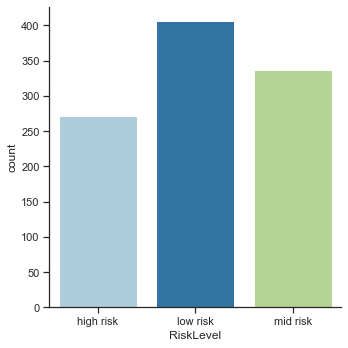

In [29]:
sns.catplot(x="RiskLevel", kind="count", palette=sns.color_palette("Paired",9), data=categorical_features)

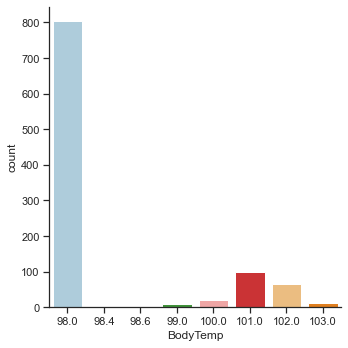

In [30]:
sns.catplot(x="BodyTemp", kind="count", palette=sns.color_palette("Paired",9), data=continuous_features)

Assessing the Data Quality of the Categorical Variable

In [31]:
categorical_features_description = categorical_features.describe()
categorical_features_description

,RiskLevel
count,1014
unique,3
top,low risk
freq,406


In [32]:
cat_missing_feature_percent = categorical_features.isnull().sum()/(len(maternal_data))*100
cat_missing_feature_percent

RiskLevel    0.0
dtype: float64

In [33]:
# Determining the mode of each value in the categorical feature

frequency = categorical_features.value_counts()
print('The respective frequencies are: ')
print(frequency)

The respective frequencies are: 
RiskLevel
low risk     406
mid risk     336
high risk    272
dtype: int64


In [34]:
# Getting the percentage mode
frequency_percent = categorical_features.value_counts(normalize=True).round(3)
print()
print('The percentage frequency is detailed below: ')
print()
print(frequency_percent*100)



The percentage frequency is detailed below: 

RiskLevel
low risk     40.0
mid risk     33.1
high risk    26.8
dtype: float64


DETECTING THE OUTLIERS IN THE CONTINUOUS VARIABLES

In [35]:
# Writing a function to determine the list of all outliers in each numerical variable using the Tukey's method

def get_outliers(numeric_frame,variable):
    FQ1 = numeric_frame[variable].quantile(0.25)  # first quartile
    FQ3 = numeric_frame[variable].quantile(0.75)  # second quartile
    IQR = FQ3 - FQ1 # calculating the inter_quartile range
    inner_fence = 1.5*IQR
    outer_fence = 3*IQR

    inner_lower_fence = FQ1 - inner_fence   # lower and upper inner_fence
    inner_upper_fence = FQ3 + inner_fence

    outer_lower_fence = FQ1 - outer_fence
    outer_upper_fence = FQ3 - outer_fence

    probable_outlier = []
    possible_outlier = []

    for index_position, data_points in enumerate(numeric_frame[variable]):
        if data_points <= outer_lower_fence or data_points >= outer_upper_fence:
            probable_outlier.append(index_position)

    for index_position, data_points in enumerate(numeric_frame[variable]):
        if data_points <= inner_lower_fence or data_points >= inner_upper_fence:
            possible_outlier.append(index_position)
    return probable_outlier, possible_outlier
list_of_probable_outlier, list_of_possible_outlier = get_outliers(continuous_features,"Age")
print(list_of_possible_outlier)
#print(list_of_probable_outlier)

[338]


Text(0.5, 0, 'Figure1: Detecting Uni-variate outliers Box plot')

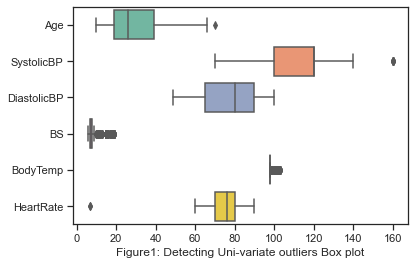

In [36]:
import seaborn as sns
continuous_features_1 = continuous_features[['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']]
graphical_outlier = sns.boxplot(data=continuous_features_1, orient="h", palette="Set2")
graphical_outlier.set_xlabel('Figure1: Detecting Uni-variate outliers Box plot')
#continuous_features.dtypes
#continuous_features.describe().round()

In [37]:
continuous_features_1.skew()

Age            0.783063
SystolicBP    -0.251189
DiastolicBP   -0.048441
BS             1.868203
BodyTemp       1.750988
HeartRate     -1.043525
dtype: float64

Handling the Outliers: using the WINSORIZATION technique

In [1]:
import scipy

from scipy.stats.mstats import winsorize

cont_outlier_recode_1 = winsorize(continuous_features_1['Age'], limits=(0.05, 0.05))
cont_outlier_recode_2 =winsorize(continuous_features_1['SystolicBP'], limits=(0.05, 0.05))
cont_outlier_recode_3 = winsorize(continuous_features_1['BS'], limits=(0.15, 0.21))
cont_outlier_recode_4 = winsorize(continuous_features_1['HeartRate'], limits=(0.05,0.05))
cont_outlier_recode_5 = winsorize(continuous_features_1['BodyTemp'], limits=(0.01,0.01))
#win = sns.boxplot(data = cont_outlier_recode, orient="h", palette="Set2")
#win_2 = sns.boxplot(data = cont_outlier_recode_2, orient="h", palette="Set2")
#win_3 = sns.boxplot(data = cont_outlier_recode_3, orient="h", palette="Set2")
#win_4 = sns.boxplot(data=cont_outlier_recode_4, orient="h", palette="Set2")
#win_5 = sns.boxplot(data=cont_outlier_recode_4, orient="h", palette="Set2")

#print(win)
#print(win_2)
#print(win_3)
#print(win_4)
age_wo = list(cont_outlier_recode_1)
sys_wo = list(cont_outlier_recode_2)
bs_wo = list(cont_outlier_recode_3)
hr_wo = list(cont_outlier_recode_4)
bt_wo = list(cont_outlier_recode_5)

NameError: name 'continuous_features_1' is not defined

* Removing Outliers
* Creating a new DataFrame of cleaned data

In [39]:
df = pd.DataFrame(age_wo[::],columns=['Age_wo'])
df2 = pd.DataFrame(sys_wo[::],columns=['SystolicBP_wo'])
df3 = pd.DataFrame(bs_wo[::],columns=['BloodSugar_wo'])
df4 = pd.DataFrame(hr_wo[::],columns=['HeartRate_wo'])
df5 = pd.DataFrame(bt_wo[::],columns=['BodyTemp_wo'])
df6 = pd.DataFrame(continuous_features_1['DiastolicBP'])
maternal_data_wo = pd.concat([df,df2,df6,df3,df4,df5,categorical_features], axis=1)
#print(maternal_data_wo)
#print(df2)
#print(df3)
#print(df4)
#print(df)

Age_wo           0.676331
SystolicBP_wo   -0.247163
DiastolicBP     -0.048441
BloodSugar_wo    0.681502
BodyTemp_wo      1.750988
HeartRate_wo     0.022495
dtype: float64

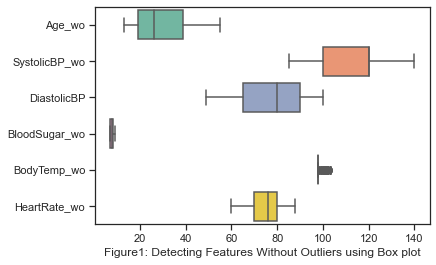

In [40]:
# Box plot after Winsorization

import seaborn as sns
continuous_features_4 = maternal_data_wo[['Age_wo','SystolicBP_wo','DiastolicBP','BloodSugar_wo','BodyTemp_wo','HeartRate_wo']]
graphical_outlier_2 = sns.boxplot(data=continuous_features_4, orient="h", palette="Set2")
graphical_outlier_2.set_xlabel('Figure1: Detecting Features Without Outliers using Box plot')
continuous_features_4.skew()

In [41]:
continuous_features_4

,Age_wo,SystolicBP_wo,DiastolicBP,BloodSugar_wo,BodyTemp_wo,HeartRate_wo
0,25,130,80,9.0,98.0,86
1,35,140,90,9.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.8,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,9.0,98.0,80
1010,55,120,90,9.0,98.0,60
1011,35,85,60,9.0,98.0,86
1012,43,120,90,9.0,98.0,70


DATABASE SECTION
* Design of the MaternalHealth database using SQLite3
* Creation of the tables in the database
* Population of the database with the cleaned, outlier-free data
* Retrieval of needed features for analytics purpose

In [42]:
import sqlite3
conn = sqlite3.connect('MaternalHealth.db')
maternal_data_wo.to_sql('Maternal_Table', conn, if_exists='replace', index=False)

1014

Uni-variate Analysis (Single features analysis using Pie Chart, Bar Chart and Histogram Plot)

Risk Level Analysis across Age Groups

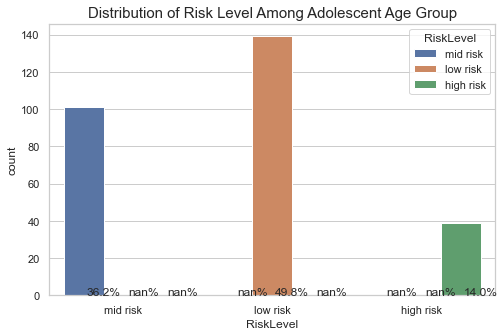

In [43]:
# Plotting the count plot: Risk Level among Adolescent Age Group

under_20_RL = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\under_20_single_variable_risk.csv')


sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = len(under_20_RL)

axes = sns.countplot(x="RiskLevel", hue="RiskLevel", data=under_20_RL)
plt.title('Distribution of Risk Level Among Adolescent Age Group', fontsize=15)
for p in axes.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_width()
    axes.annotate(percentage, (x,y), ha='center')

plt.show()

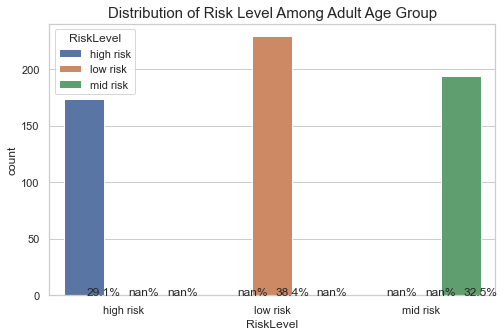

In [44]:
# Count plot of Risk Level distribution among ages 20 and 49

adult_RL_data = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\between_20_and_49_RL.csv')
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = len(adult_RL_data)

axes = sns.countplot(x="RiskLevel", hue="RiskLevel", data=adult_RL_data)
plt.title('Distribution of Risk Level Among Adult Age Group', fontsize=15)
for p in axes.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_width()
    axes.annotate(percentage, (x,y), ha='center')

plt.show()
#print(adult_RL_data)

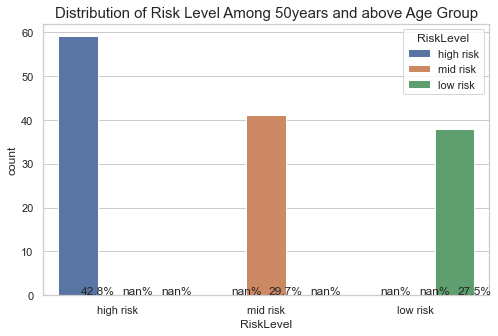

In [45]:
# Count plot of Risk Level distribution among older than 50 age group

elderly_RL_data = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\older_than_50_RL.csv')

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = len(elderly_RL_data)

axes = sns.countplot(x="RiskLevel", hue="RiskLevel", data=elderly_RL_data)
plt.title('Distribution of Risk Level Among 50years and above Age Group', fontsize=15)
for p in axes.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_width()
    axes.annotate(percentage, (x,y), ha='center')

plt.show()
#print(elderly_RL_data)

GESTATIONAL DIABETES-(a focus on fasting BLOOD SUGAR) ACROSS AGE GROUP AND THEIR CORRESPONDING LEVEL OF RISK--(Research has shown it effect of Blood sugar on placenta)

* The respective risk distribution are plotted using the Tableau software.

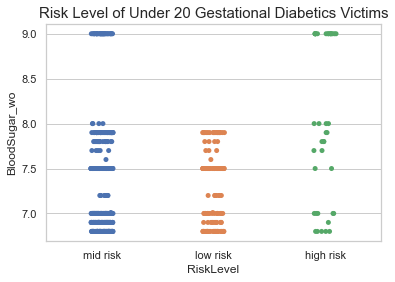

In [46]:
df = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\under_20_gestationalDB_risk.csv')

#plt.scatter(df.index, df['BloodSugar_wo'])
#sns.scatterplot(x=df.index, y=df['BloodSugar_wo'], hue=df['RiskLevel'])

#plt.figure(figsize=(6,6))
#plt.title('Risk Level of Under 20 Gestational Diabetics Victims')
#plt.xlabel('index',fontsize=20)
#plt.ylabel('Blood Sugar',fontsize=20)
#plt.plot(df.index,df['BloodSugar_wo'],markevery=1,marker='d')
#for name, group in df.groupby('RiskLevel'):
    #plt.plot(group.index,group['BloodSugar_wo'], label=name,markevery=1,marker='d')

#sns.set(rc={'figure.figsize':(7,7)})
#sns.set(font_scale=1.5)
#fig = sns.lineplot(x=df.index,y=df['BloodSugar_wo'],markevery=1,marker='d',data=df,hue=df['RiskLevel'])
#fig.set(xlabel='index')
sns.stripplot(y=df['BloodSugar_wo'])
sns.stripplot(x=df['RiskLevel'], y=df['BloodSugar_wo'])
plt.title('Risk Level of Under 20 Gestational Diabetics Victims', fontsize=15)
plt.show()
#print(df)

Heart Beats analysis based on the Age for High, Mid and Low Risk

* Histogram plots for evaluating trends across heart beat and Age

In [47]:
# Heart Beat Rate Low risk -- Analysis(Under_20)

LR_HBR_UNDER_20 = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\LR_HBR_UNDER_20.csv')
print(LR_HBR_UNDER_20)

     Age_wo  HeartRate_wo RiskLevel
0        15            70  low risk
1        13            70  low risk
2        18            70  low risk
3        16            80  low risk
4        19            66  low risk
..      ...           ...       ...
134      13            66  low risk
135      13            60  low risk
136      13            80  low risk
137      17            67  low risk
138      17            86  low risk

[139 rows x 3 columns]


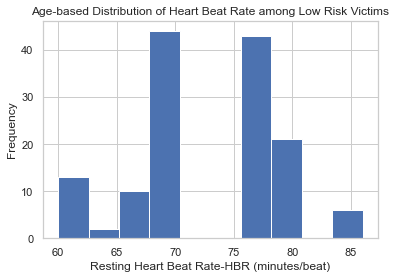

In [48]:
plt.title('Age-based Distribution of Heart Beat Rate among Low Risk Victims')
plt.xlabel('Resting Heart Beat Rate-HBR (minutes/beat)')
plt.ylabel('Frequency')
plt.hist(LR_HBR_UNDER_20['HeartRate_wo'])
plt.show()

In [49]:
# Heart Beat Rate MidRisk Analysis

MR_HBR_UNDER_20 = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\MR_HBR_UNDER_20.csv')
#print(MR_HBR_UNDER_20)

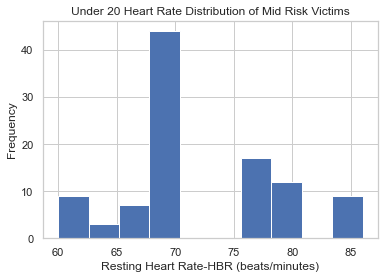

In [50]:
plt.title('Under 20 Heart Rate Distribution of Mid Risk Victims')
plt.xlabel('Resting Heart Rate-HBR (beats/minutes)')
plt.ylabel('Frequency')
plt.hist(MR_HBR_UNDER_20['HeartRate_wo'])
plt.show()

In [51]:
# Heart Beat Rate - High Risk Analysis for Under 20

HR_HBR_UNDER_20 = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\HR_HBR_UNDER_20.csv')

#print(HR_HBR_UNDER_20)

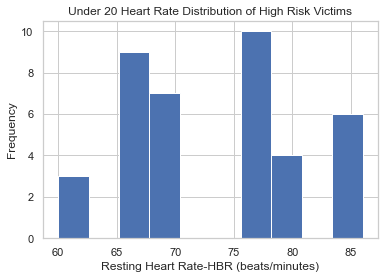

In [52]:
plt.title('Under 20 Heart Rate Distribution of High Risk Victims')
plt.xlabel('Resting Heart Rate-HBR (beats/minutes)')
plt.ylabel('Frequency')
plt.hist(HR_HBR_UNDER_20['HeartRate_wo'])
plt.show()

In [53]:
# Heart Beat Rate - Low Risk Analysis for Age Between 20 and 49

LR_HBR_BETWEEN_20_AND_49 = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\LR_HBR_BETWEEN_20_AND_49.csv')

#print(LR_HBR_BETWEEN_20_AND_49)

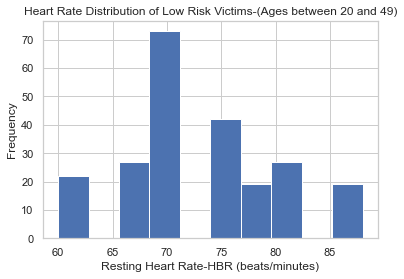

In [54]:
# Heart Beat Rate - Low Risk Analysis Between Ages 20 and 49

plt.title('Heart Rate Distribution of Low Risk Victims-(Ages between 20 and 49)')
plt.xlabel('Resting Heart Rate-HBR (beats/minutes)')
plt.ylabel('Frequency')
plt.hist(LR_HBR_BETWEEN_20_AND_49['HeartRate_wo'])
plt.show()

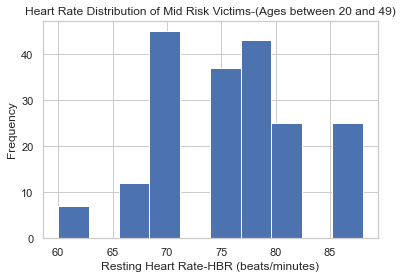

In [55]:
# Heart Beat Distribution among Mid-Risk Victims Between the Ages 20 and 49

MR_HBR_BETWEEN_20_AND_49 = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\MR_HBR_BETWEEN_20_AND_49.csv')

#print(MR_HBR_BETWEEN_20_AND_49)
# Heart Beat Rate - MidRisk Analysis Between Ages 20 and 49

plt.title('Heart Rate Distribution of Mid Risk Victims-(Ages between 20 and 49)')
plt.xlabel('Resting Heart Rate-HBR (beats/minutes)')
plt.ylabel('Frequency')
plt.hist(MR_HBR_BETWEEN_20_AND_49['HeartRate_wo'])
plt.show()

In [56]:
# Heart Beat Rate Distribution of Ages Between 20 and 49-High Risk Analysis

HR_HBR_BETWEEN_20_AND_49 = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\HR_HBR_BETWEEN_20_AND_49.csv')

#print(HR_HBR_BETWEEN_20_AND_49)

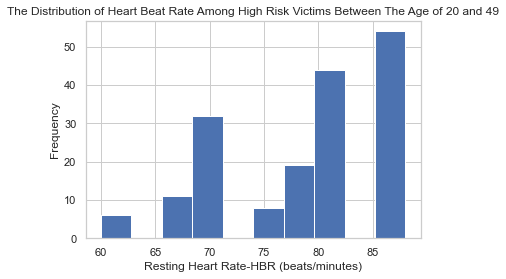

In [57]:
# Heart Beat Rate - HighRisk Analysis Between Ages 20 and 49

plt.title('The Distribution of Heart Beat Rate Among High Risk Victims Between The Age of 20 and 49')
plt.xlabel('Resting Heart Rate-HBR (beats/minutes)')
plt.ylabel('Frequency')
plt.hist(HR_HBR_BETWEEN_20_AND_49['HeartRate_wo'])
plt.show()

* Heartbeat Rate Distribution Across RiskLevels for Ages Above 49 are plotted in Tableau
* BodyTemperature Distribution Across RiskLevels are plotted in Tableau

* Distribution plots of Systolic and Diastolic blood pressures for low, mid and risk victims
* Distribution plot of the Mean Artillery Pressure (MAP)
* These plots are done with Tableau

* Distribution plots of different Age categories and their associated risk level is done in a Tableau Dashboard

BI-VARIATE AND MULTIVARIATE FEATURE EXPLORATION - (MULTIVARIATE ANALYSIS)

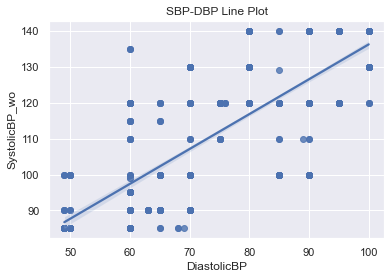

The SBP-DBP correlation coefficient and p-value is: (0.7787402406857542, 3.847203323923706e-207)


In [58]:
# Regression Models
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot of DiastolicBP on SystolicBP

sys_dias_df = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\Systolic_Diastolic_BP.csv')
#print(sys_dias_df)
from scipy import stats
sns.set_theme(color_codes=True)
sns.regplot(x='DiastolicBP', y='SystolicBP_wo', data=sys_dias_df)
plt.title('SBP-DBP Line Plot')
plt.show()

corr = stats.pearsonr(sys_dias_df['SystolicBP_wo'], sys_dias_df['DiastolicBP'])
print(f'The SBP-DBP correlation coefficient and p-value is: {corr}')

Age Based comparison of SBP-DBP line plot: this comparison would assess the age group that has the most significant correlation value.

In [60]:
# Under 20 Systolic-Diastolic line plot data

u20_sys_dias = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\sys_dia_under_20_corr_comp..csv')

#print(u20_sys_dias)

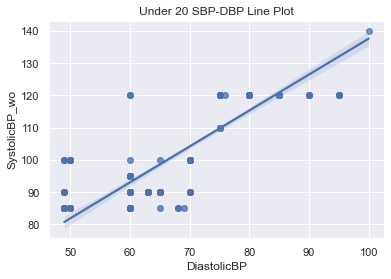

The SBP-DBP correlation coefficient and p-value is: (0.8685026758637506, 2.0554411102326157e-86)


In [61]:
from scipy import stats
sns.set_theme(color_codes=True)
sns.regplot(x='DiastolicBP', y='SystolicBP_wo', data=u20_sys_dias)
plt.title('Under 20 SBP-DBP Line Plot')
plt.show()

corr = stats.pearsonr(u20_sys_dias['SystolicBP_wo'], u20_sys_dias['DiastolicBP'])
print(f'The SBP-DBP correlation coefficient and p-value is: {corr}')

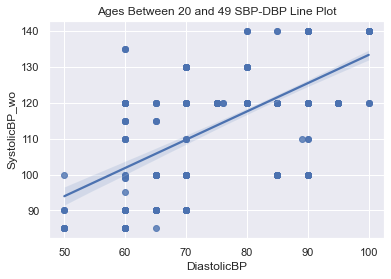

The SBP-DBP correlation coefficient and p-value is: (0.669592891730835, 6.786386071540413e-79)


In [62]:
# Between 20 and 49 Systolic-Diastolic line plot
sys_dias_20_49 = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\sys_dia_between_20_and_49_corr_comp..csv')
#print(sys_dias_20_49)

from scipy import stats
sns.set_theme(color_codes=True)
sns.regplot(x='DiastolicBP', y='SystolicBP_wo', data=sys_dias_20_49)
plt.title('Ages Between 20 and 49 SBP-DBP Line Plot')
plt.show()

corr = stats.pearsonr(sys_dias_20_49['SystolicBP_wo'], sys_dias_20_49['DiastolicBP'])
print(f'The SBP-DBP correlation coefficient and p-value is: {corr}')

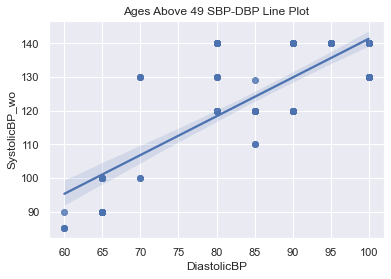

The SBP-DBP correlation coefficient and p-value is: (0.8204945558996384, 7.743522056802495e-35)


In [63]:
# Above 49 Systolic/Diastolic line plot
import seaborn as sns
sys_dias_over49 = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\sys_dia_above_49_corr_comp..csv')

#print(sys_dia_over49)

from scipy import stats
sns.set_theme(color_codes=True)
sns.regplot(x='DiastolicBP', y='SystolicBP_wo', data=sys_dias_over49)
plt.title('Ages Above 49 SBP-DBP Line Plot')
plt.show()

corr = stats.pearsonr(sys_dias_over49['SystolicBP_wo'], sys_dias_over49['DiastolicBP'])
print(f'The SBP-DBP correlation coefficient and p-value is: {corr}')

1. A dashboard for Hypertensive pregnant women showing the relationship between Age/BloodSugar,BloodSugar/HeartBeatRate, Age/HeartBeatRate and their corresponding Risk Levels is built in Tableau.
2. A dashboard of pregnant women with ideal blood showing the relationship between Age/BloodSugar,BloodSugar/HeartBeatRate, Age/HeartBeatRate and their corresponding Risk Levels is built in Tableau.
3. A dashboard of pregnant women with elevated blood pressure showing the relationship between Age/BloodSugar,BloodSugar/HeartBeatRate, Age/HeartBeatRate and their corresponding Risk Levels is built in Tableau.

In [64]:
# A dashboard for Hypertensive pregnant women showing the relationship between Age/BloodSugar,BloodSugar/HeartBeatRate, Age/HeartBeatRate and their corresponding Risk Levels

fd = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\HighBloodPressureAgeBSData.csv')

# The corresponding visualization has been in Tableau

# print(fd)

In [65]:
# 1. A dashboard for Hypertensive pregnant women showing the relationship between Age/BloodSugar,BloodSugar/HeartBeatRate, Age/HeartBeatRate and their corresponding Risk Levels is built in Tableau.

# 2. A dashboard for pregnant women with Ideal Blood Pressure showing the relationship between Age/BloodSugar, BloodSugar/HeartBeatRate, Age/HeartBeatRate and their corresponding Risk Levels is designed in Tableau.

# 3.  A dashboard for pregnant women with Elevated Blood Pressure showing the relationship between Age/BloodSugar, BloodSugar/HeartBeatRate, Age/HeartBeatRate and their corresponding Risk Levels is designed in Tableau.

CORRELATION MATRIX AMONG SYSTOLIC, DIASTOLIC, AND THE MEAN ARTERIAL PRESSURE

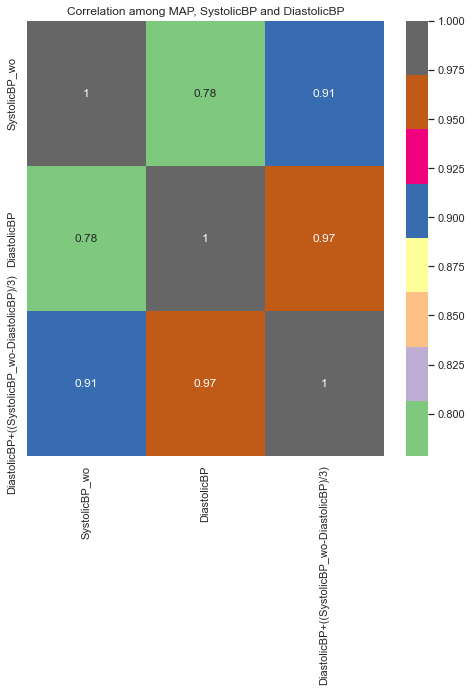

In [66]:
bp_data = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\MeanAterialPressure_Systolic_Diastolic_CorrMap.csv')
#print(bp_data)

corrmatrix = bp_data.corr()
bp_relation = corrmatrix.index
plt.figure(figsize=(8, 8))
g = sns.heatmap(bp_data[bp_relation].corr(), annot=True, cmap="Accent")
plt.title('Correlation among MAP, SystolicBP and DiastolicBP')
plt.show()

NUMERICAL ANALYSIS AND VISUALIZATION FOR UNLOCKING VALUABLE INSIGHT
1. Retrieve the unique ages for the top 5 average heartbeat Rates and the percentage RiskLevels
2. Retrieve the top 5 unique BloodSugar levels and percentage Risk Levels for stage 2 hypertensive pregnant women
3. Retrieve the SystolicBP and DiastolicBP of Low, Mid and High RiskLevels pregnant women with Body temperature > 98 degree Fahrenheit.

   Age_wo  avg(HeartRate_wo)  RiskLevel
0      48               88.0   mid risk
1      46               88.0  high risk
2      37               88.0  high risk
3      38               86.0  high risk
4      26               86.0   mid risk


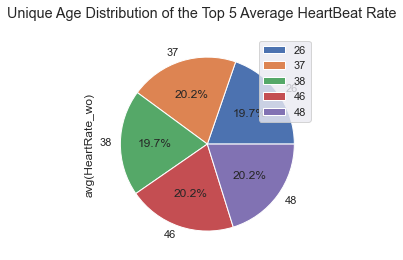

array([<AxesSubplot:ylabel='Age_wo'>], dtype=object)

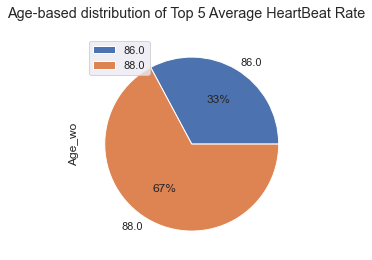

In [67]:
# 1: There are forty unique ages
# The unique ages for the top 5 average heartbeat rates are 48, 46,37, 38 and 26
# The top 5 average heartbeat are 88,88,88,86 and 86
import pandas as pd
import matplotlib.pyplot as plt

top_five_HBR_unique_age = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\top5_HBR_unique_ages.csv')

print(top_five_HBR_unique_age)

top_five_HBR_unique_age.groupby(['Age_wo']).sum().plot(kind='pie', subplots=True, autopct='%1.1f%%',title='Unique Age Distribution of the Top 5 Average HeartBeat Rate')
plt.show()
top_five_HBR_unique_age.groupby(['avg(HeartRate_wo)']).sum().plot(kind='pie', subplots=True, autopct='%1.0f%%',title='Age-based distribution of Top 5 Average HeartBeat Rate')

array([<AxesSubplot:ylabel='Age_wo'>,
       <AxesSubplot:ylabel='avg(HeartRate_wo)'>], dtype=object)

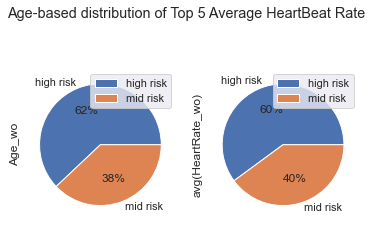

In [68]:
top_five_HBR_unique_age.groupby(['RiskLevel']).sum().plot(kind='pie', subplots=True, autopct='%1.0f%%',title='Age-based distribution of Top 5 Average HeartBeat Rate')

In [69]:
# 2 The top 5 unique blood sugar is; 9, 8, 7.9, 7.8, 7.5
# The RiskLevel is 100% high.

unique_top5_BS = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\unique_BS_data.csv')

unique_top5_BS

# The Graphical plot is done in TABLEAU.

,BloodSugar_wo,RiskLevel
0,9.0,high risk
1,8.0,high risk
2,7.9,high risk
3,7.8,high risk
4,7.5,high risk


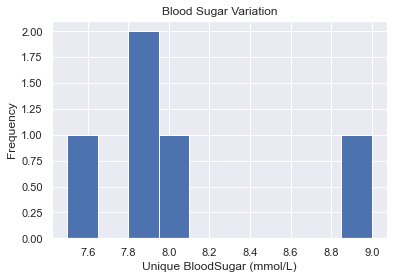

In [70]:
sb_exp_data = unique_top5_BS
plt.title('Blood Sugar Variation')
plt.xlabel('Unique BloodSugar (mmol/L)')
plt.ylabel('Frequency')
plt.hist(unique_top5_BS['BloodSugar_wo'])
plt.show()

   SystolicBP_wo  DiastolicBP  BodyTemp_wo  RiskLevel
0             85           60        102.0  high risk
1             90           70        100.0  high risk
2             95           60         98.0   mid risk
3            100           70         98.0   mid risk
4            110           60        100.0   mid risk
5            115           65         98.0   mid risk
6            120           90         98.0   mid risk
7            130           80         98.0  high risk
8            135           60        101.0  high risk
9            140           90         98.0  high risk


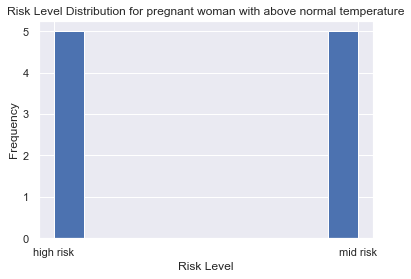

In [71]:
# 3 This analysis is done to find the percentage of low, middle, high risk, systolic and diastolic pressure and   for pregnant women with body high temperature.

# High temperature is defined as the temperature above the normal body temperature(98 degree Fahrenheit)


unique_systolic_RL_at_normal_temp = pd.read_csv(r'C:\Users\Dell\PycharmProjects\pythonProject2\uniqueSystolic_at_normalTemp.csv')

print(unique_systolic_RL_at_normal_temp)

# Outcome: At temperature above the normal, there is 50% probability of pregnant women being mid or high risk. 30% of the systolic blood pressure is found to be high

plt.title('Risk Level Distribution for pregnant woman with above normal temperature')
plt.xlabel('Risk Level')
plt.ylabel('Frequency')
plt.hist(unique_systolic_RL_at_normal_temp['RiskLevel'])
plt.show()

In [72]:
from sklearn.preprocessing import LabelEncoder
la_encode = LabelEncoder()
# Get the matrix X
X = continuous_features_4.to_numpy()
y= la_encode.fit_transform(maternal_data['RiskLevel'])
#print(len(X))
#print(len(y))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# using the standard scalar: setting the feature to have an average of zero and standard deviation of one
# Standard Scaler = ss

ss = StandardScaler()
X2 = ss.fit_transform(X) # Input Variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# The Model: Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5,splitter='best',criterion='gini',random_state=10,ccp_alpha=0.01)
clf = clf.fit(X_train,y_train)
clf.get_params()
list(X_test)
import numpy as np

my_predict = [np.array([ 15. , 100. , 70. , 7. , 87. , 60. ])]
prediction = clf.predict(my_predict)
if prediction== 0:
    print('This patient is High risk')
elif prediction==1:
    print('This patient is Low risk')
elif prediction==2:
    print('This patient is mid risk')
# Showing the probability of prediction
#print(prediction)
predict = clf.predict_proba(X_test)
act_predict=[]
for i in predict:
    act_predict.append(np.argmax(i))


This patient is Low risk


THE MODEL ACCURACY
1. F1-Accuracy
2. Confusion matrix
3. Classification report
4. Precision and
5. Recall

              precision    recall  f1-score   support

   high risk       0.76      0.77      0.77        84
    low risk       0.62      0.86      0.72       116
    mid risk       0.51      0.29      0.37       105

    accuracy                           0.64       305
   macro avg       0.63      0.64      0.62       305
weighted avg       0.62      0.64      0.61       305



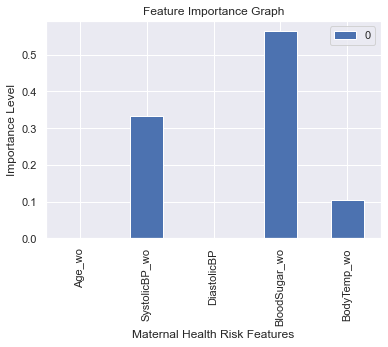

In [73]:
# Model Accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, act_predict)
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, act_predict)
# Calculating the precision

from sklearn.metrics import precision_score
precision_score(y_test,act_predict, average='macro')
from  sklearn.metrics import classification_report
print(classification_report(y_test,act_predict,target_names=['high risk','low risk', 'mid risk']))
# Get the column index of the features

feature_names = continuous_features_4.columns
#feature_names
# Converting the feature ranking values and their corresponding headings into a DataFrame



feature_importance = clf.feature_importances_
#feature_importance
feature_rank = pd.DataFrame(clf.feature_importances_,index=feature_names)
#feature_rank
# Feature Importance Graph

features = list(feature_rank[feature_rank[0]>0].index)
#features
feature_rank.head(5).plot(kind='bar')
plt.title('Feature Importance Graph')
plt.xlabel('Maternal Health Risk Features')
plt.ylabel('Importance Level')
plt.show()

VIEW HOW THE MODEL IS WORKING: Plotting the Decision Tree

[Text(1065.2727272727273, 1494.8999999999999, 'BloodSugar_wo <= 8.5\ngini = 0.656\nsamples = 709\nvalue = [188, 290, 231]\nclass = low risk'),
 Text(760.909090909091, 1223.1, 'SystolicBP_wo <= 132.5\ngini = 0.574\nsamples = 541\nvalue = [56, 287, 198]\nclass = low risk'),
 Text(608.7272727272727, 951.3, 'SystolicBP_wo <= 129.5\ngini = 0.525\nsamples = 504\nvalue = [23, 287, 194]\nclass = low risk'),
 Text(456.54545454545456, 679.4999999999999, 'BodyTemp_wo <= 99.5\ngini = 0.514\nsamples = 478\nvalue = [23, 287, 168]\nclass = low risk'),
 Text(304.3636363636364, 407.6999999999998, 'BloodSugar_wo <= 7.005\ngini = 0.439\nsamples = 385\nvalue = [4, 263, 118]\nclass = low risk'),
 Text(152.1818181818182, 135.89999999999986, 'gini = 0.506\nsamples = 208\nvalue = [3, 116, 89]\nclass = low risk'),
 Text(456.54545454545456, 135.89999999999986, 'gini = 0.283\nsamples = 177\nvalue = [1, 147, 29]\nclass = low risk'),
 Text(608.7272727272727, 407.6999999999998, 'gini = 0.603\nsamples = 93\nvalue = 

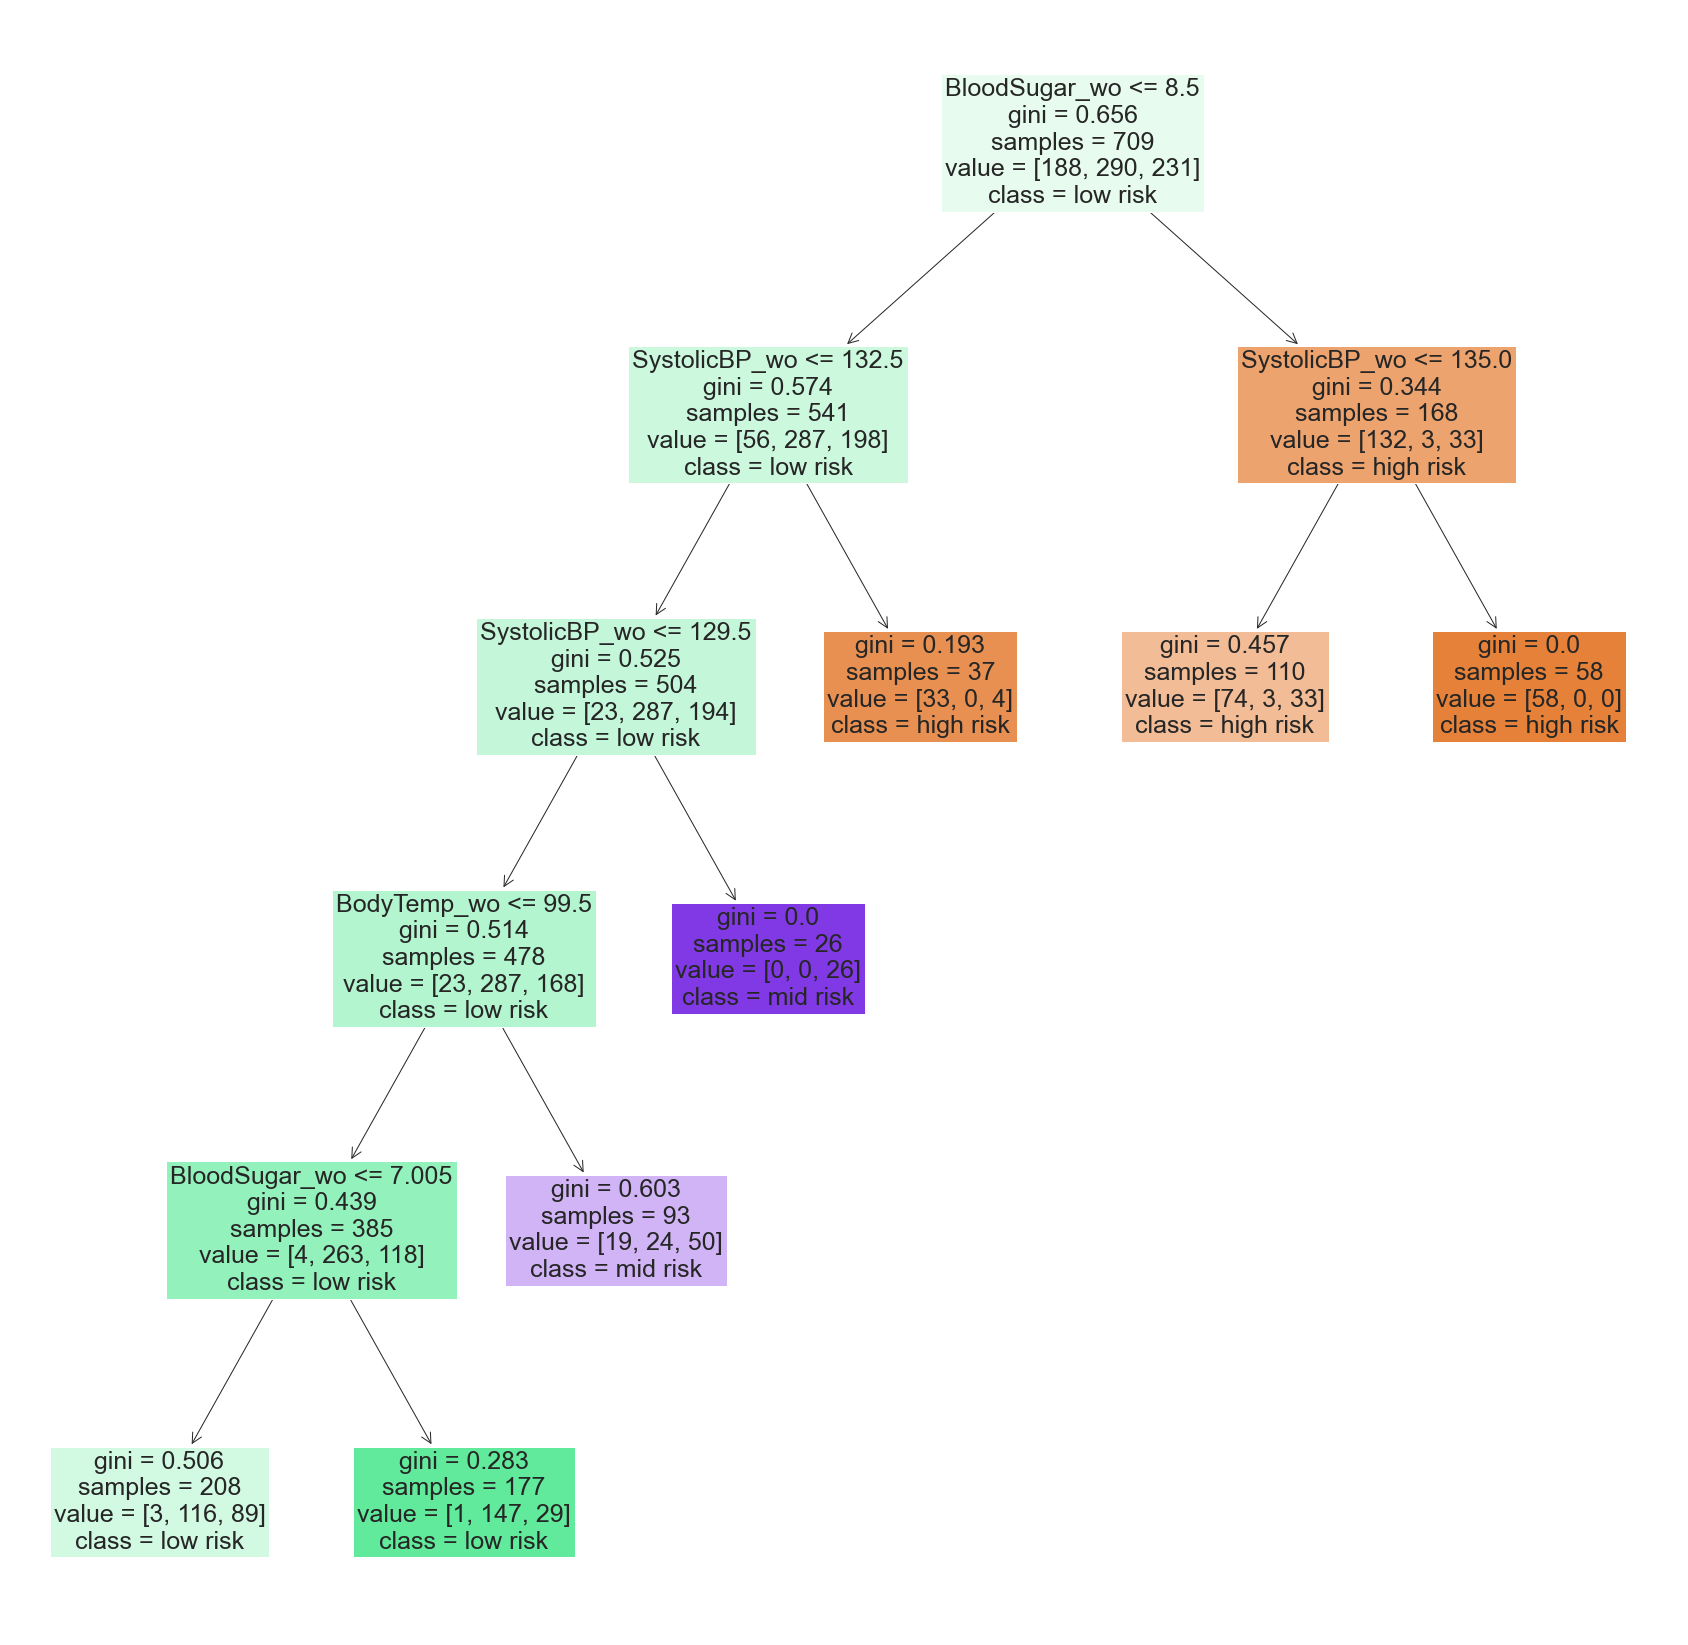

In [74]:
# Plot the Decision Tree

from sklearn import tree
fig = plt.figure(figsize=(30,30))
tree_diagram = tree.plot_tree(clf,feature_names=feature_names,class_names={0:'high risk', 1:'low risk', 2:'mid risk'},filled=True, fontsize=25)

tree_diagram